### 初始化股票編號、股票中文名稱對照

In [1]:
stock_no = { 0: 1101, 1: 1216, 2: 1301, 3: 1303, 4: 1326, 5: 1590, 6: 2002, 7: 2207, 8: 2303, 9: 2308
          , 10: 2317, 11: 2327, 12: 2330, 13: 2357, 14: 2379, 15: 2382, 16: 2395, 17: 2408, 18: 2409
          , 19: 2412, 20: 2454, 21: 2603, 22: 2609, 23: 2615, 24: 2801, 25: 2880, 26: 2881, 27: 2882
          , 28: 2884, 29: 2885, 30: 2886, 31: 2887, 32: 2891, 33: 2892, 34: 2912, 35: 3008, 36: 3034
          , 37: 3037, 38: 3045, 39: 3711, 40: 4904, 41: 4938, 42: 5871, 43: 5876, 44: 5880, 45: 6415
          , 46: 6505, 47: 8046, 48: 8454, 49: 9910}

stock_chinese_name = { 1101 : "台泥", 1216 : "統一", 1301 : "台塑", 1303 : "南亞", 1326 : "台化", 1590 : "亞德客-KY", 
                      2002 : "中鋼", 2207 : "和泰車", 2303 : "聯電", 2308 : "台達電", 2317 : "鴻海", 2327 : "國巨", 
                      2330 : "台積電", 2357 : "華碩", 2379 : "瑞昱", 2382 : "廣達", 2395 : "研華", 2408 : "南亞科技", 
                      2409 : "友達", 2412 : "中華電", 2454 : "聯發科", 2603 : "長榮", 2609 : "陽明", 2615 : "萬海", 
                      2801 : "彰銀", 2880 : "華南金", 2881 : "富邦金", 2882 : "國泰金", 2884 : "玉山金", 2885 : "元大金", 
                      2886 : "兆豐金", 2887 : "台新金", 2891 : "中信金", 2892 : "第一金", 2912 : "統一超", 3008 : "大立光", 
                      3034 : "聯詠", 3037 : "欣興", 3045 : "台灣大哥大", 3711 : "日月光投控", 4904 : "遠傳", 4938 : "和碩", 
                      5871 : "中租", 5876 : "上海商銀", 5880 : "合庫金", 6415 : "矽力-KY", 6505 : "台塑石化", 8046 : "南電",
                      8454 : "富邦媒體", 9910 : "豐泰"}


In [2]:
#載入pandas
import pandas as pd

#載入資料檔
df = pd.read_csv('/Users/xueyichen/Desktop/NTUT/110-2/Data Science/final/data/total.csv')

#將第一行（col）轉變爲Index
df.set_index('Index',inplace = True)

In [3]:
#檢查是否有缺漏值
df.isnull().values.any()

False

In [4]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

pair = []

for i in range(0,49):
    for j in range(i+1,50):
        
        result = adfuller(df.iloc[:, i] - df.iloc[:, j])
        if result[1] < 0.05 and result[0] < result[4].get("1%"):
            pair.append([i,j,result])
        

In [5]:
for i in range(len(pair)) :
    stock1_name = stock_chinese_name.get(stock_no.get(pair[i][0]))
    stock2_name = stock_chinese_name.get(stock_no.get(pair[i][1]))
    print(f'股票編號 ：{pair[i][0]} & {pair[i][1]}  股票名稱 {stock1_name} & {stock2_name}')

股票編號 ：1 & 38  股票名稱 統一 & 台灣大哥大
股票編號 ：4 & 46  股票名稱 台化 & 台塑石化
股票編號 ：19 & 25  股票名稱 中華電 & 華南金
股票編號 ：19 & 30  股票名稱 中華電 & 兆豐金
股票編號 ：19 & 31  股票名稱 中華電 & 台新金
股票編號 ：19 & 32  股票名稱 中華電 & 中信金
股票編號 ：19 & 33  股票名稱 中華電 & 第一金
股票編號 ：19 & 44  股票名稱 中華電 & 合庫金
股票編號 ：37 & 42  股票名稱 欣興 & 中租
股票編號 ：38 & 40  股票名稱 台灣大哥大 & 遠傳


In [6]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['Arial Unicode MS'] #正常顯示中文 
plt.rcParams['font.sans-serif'] = ['KaiTi']#作圖的中文
plt.rcParams['font.serif'] = ['KaiTi']#作圖的中文
plt.rcParams['axes.unicode_minus'] = False # 解決保存圖像是負號'-'顯示為方塊的問題
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
from statsmodels.tsa.stattools import coint
import statsmodels
import statsmodels.api as sm

### 台哥大&遠傳

0.038500267622708195


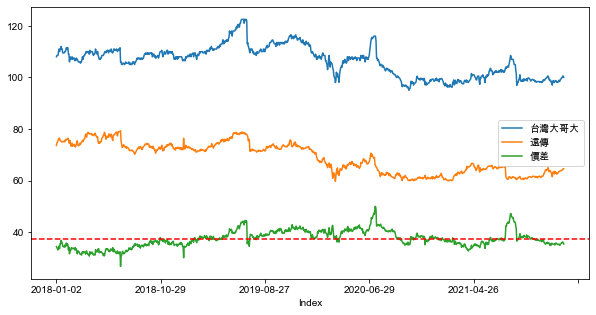

In [7]:
df.iloc[:, 38].plot(figsize=(10,5))
df.iloc[:, 40].plot(figsize=(10,5))
(df.iloc[:, 38] - df.iloc[:, 40]).plot(figsize=(10,5))
plt.axhline((df.iloc[:, 38] - df.iloc[:, 40]).mean(), color='red', linestyle='--') # Add the mean
plt.legend(['台灣大哥大', '遠傳','價差'])
score, pvalue, _ = coint(df.iloc[:, 38] , df.iloc[:, 40])
print(pvalue)

計算價差比例（股票A/股票B）
將測資分爲train/test
比例爲7/3

In [8]:
ratios =  df.iloc[:, 38] / df.iloc[:, 40]
print(int(len(ratios) * 0.70))
train = ratios[:681]
test = ratios[681:]

681



訓練集

1.5483867849200996


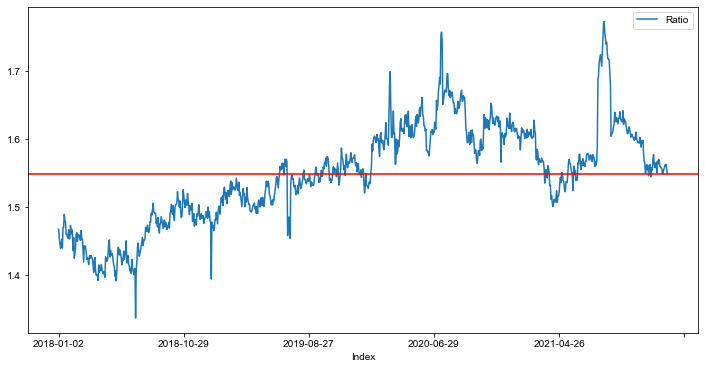

In [9]:
ratios.plot(figsize=(12,6))
plt.axhline(ratios.mean(), color = 'red')
print(ratios.mean())
plt.legend(['Ratio'])

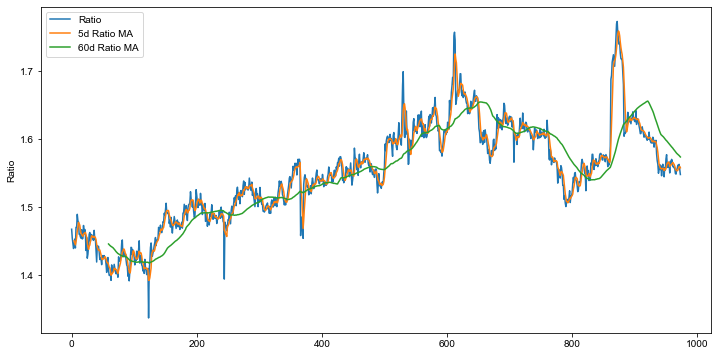

In [10]:
ratios_mavg5 = ratios.rolling(window=5, center=False).mean()
ratios_mavg60 = ratios.rolling(window=60, center=False).mean()
std_60 = ratios.rolling(window=60, center=False).std()
zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
plt.figure(figsize=(12, 6))
plt.plot(ratios.values)
plt.plot(ratios_mavg5.values)
plt.plot(ratios_mavg60.values)
plt.legend(['Ratio', '5d Ratio MA', '60d Ratio MA'])

plt.ylabel('Ratio')
plt.show()

畫出Z score

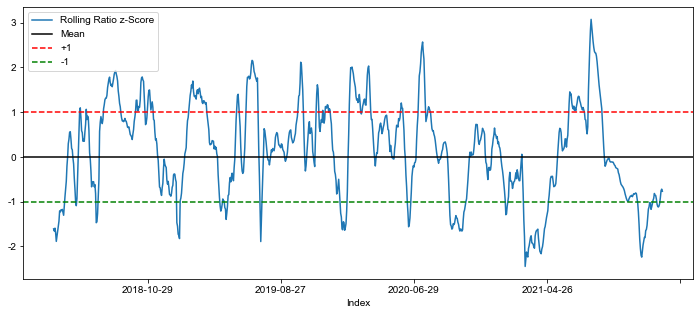

In [11]:
plt.figure(figsize=(12,5))
zscore_60_5.plot()
#plt.xlim('2013-03-25', '2016-07-01')
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.show()


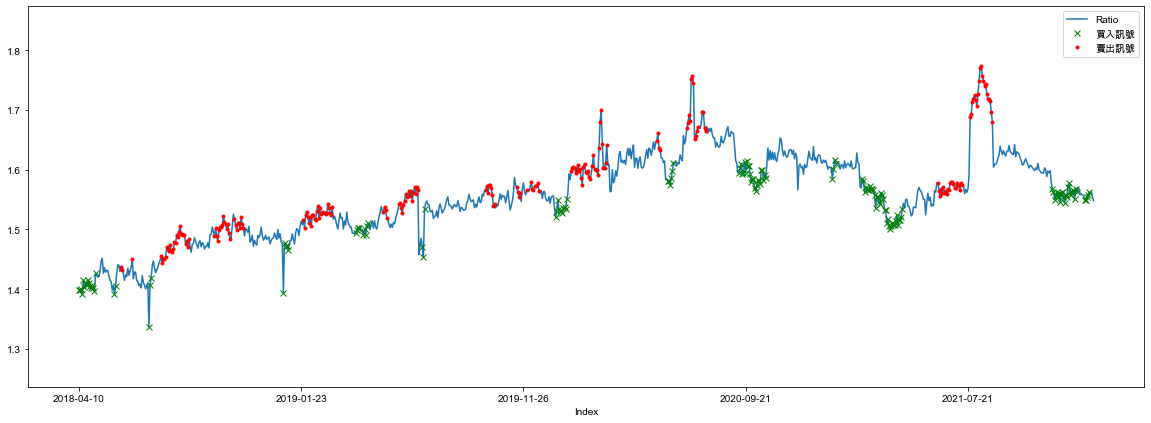

In [12]:
ratios[60:].plot(figsize=(20,7))
buy = ratios.copy()
sell = ratios.copy()
buy[zscore_60_5>-1] = 0
sell[zscore_60_5<1] = 0
buy[60:].plot(color='g', linestyle='None', marker='x')
sell[60:].plot(color='r', linestyle='None', marker='.')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratios.min()-0.1, ratios.max()+0.1))
#plt.xlim('2013-08-15','2016-07-07')
plt.legend(['Ratio', '買入訊號', '賣出訊號'])
plt.show()

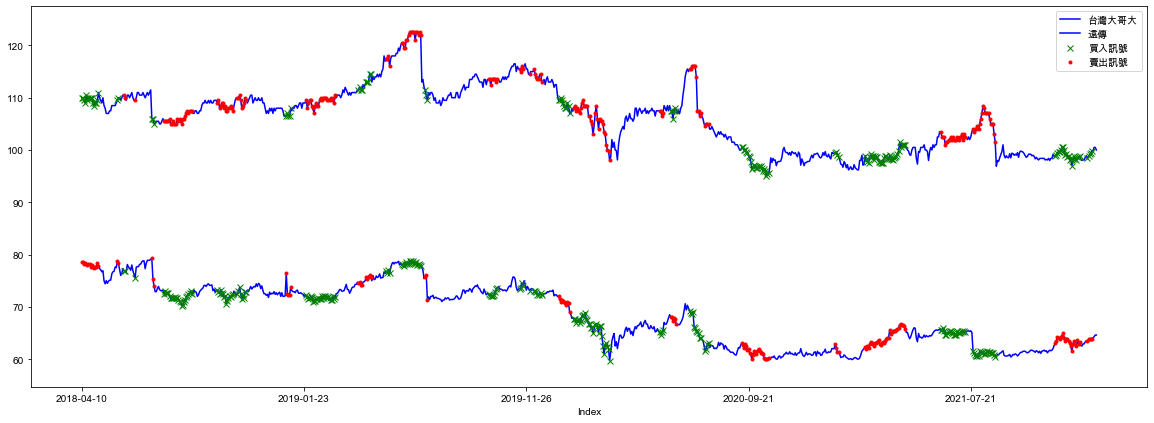

In [13]:
plt.figure(figsize=(20,7))
S1 = df.iloc[:, 38]
S2 = df.iloc[:, 40]

S1[60:].plot(color='b')
S2[60:].plot(color='b')
buyR = 0*S1.copy()
sellR = 0*S1.copy()

# When you buy the ratio, you buy stock S1 and sell S2
buyR[buy!=0] = S1[buy!=0]
sellR[buy!=0] = S2[buy!=0]

# When you sell the ratio, you sell stock S1 and buy S2
buyR[sell!=0] = S2[sell!=0]
sellR[sell!=0] = S1[sell!=0]

buyR[60:].plot(color='g', linestyle='None', marker='x')
sellR[60:].plot(color='r', linestyle='None', marker='.')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, min(S1.min(), S2.min()) -5 , max(S1.max(), S2.max()) +5))
#plt.ylim(25, 105)
#plt.xlim('2013-03-22', '2016-07-04')

plt.legend(['台灣大哥大', '遠傳', '買入訊號', '賣出訊號'])
plt.show()

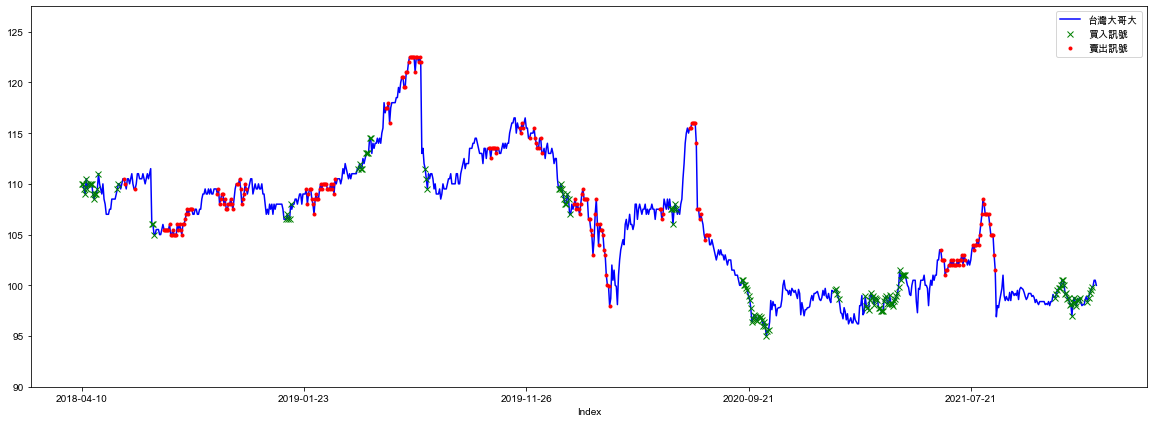

In [14]:
plt.figure(figsize=(20,7))
S1 = df.iloc[:, 38]

S1[60:].plot(color='b')
buyR = 0*S1.copy()
sellR = 0*S1.copy()

# When you buy the ratio, you buy stock S1 and sell S2
buyR[buy!=0] = S1[buy!=0]

# When you sell the ratio, you sell stock S1 and buy S2
sellR[sell!=0] = S1[sell!=0]

buyR[60:].plot(color='g', linestyle='None', marker='x')
sellR[60:].plot(color='r', linestyle='None', marker='.')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, S1.min() -5 , S1.max() +5))
#plt.ylim(25, 105)
#plt.xlim('2013-03-22', '2016-07-04')

plt.legend(['台灣大哥大', '買入訊號', '賣出訊號'])
plt.show()

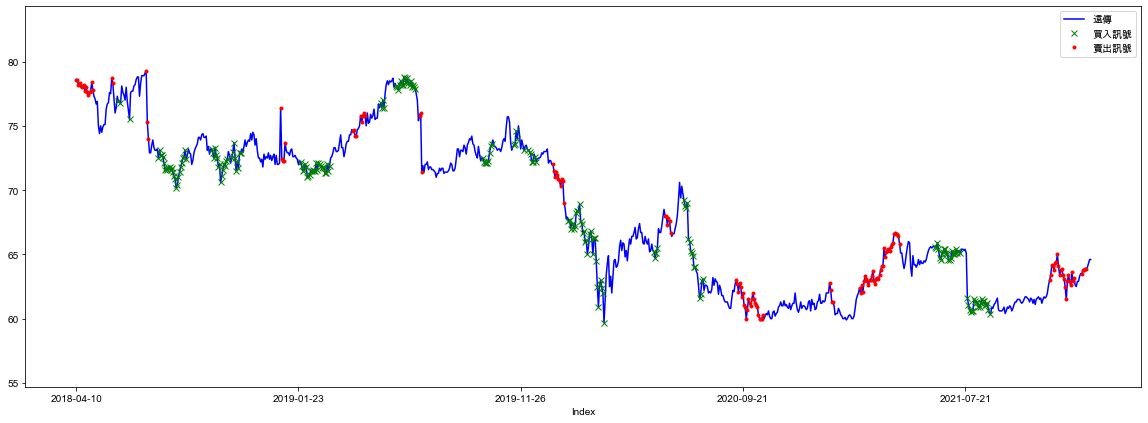

In [15]:
plt.figure(figsize=(20,7))
S2 = df.iloc[:, 40]

S2[60:].plot(color='b')
buyR = 0*S1.copy()
sellR = 0*S1.copy()

# When you buy the ratio, you buy stock S1 and sell S2
sellR[buy!=0] = S2[buy!=0]

# When you sell the ratio, you sell stock S1 and buy S2
buyR[sell!=0] = S2[sell!=0]

buyR[60:].plot(color='g', linestyle='None', marker='x')
sellR[60:].plot(color='r', linestyle='None', marker='.')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, S2.min() -5 , S2.max() +5))
#plt.ylim(25, 105)
#plt.xlim('2013-03-22', '2016-07-04')

plt.legend(['遠傳', '買入訊號', '賣出訊號'])
plt.show()

###  台化 & 台塑石化

0.038500267622708195


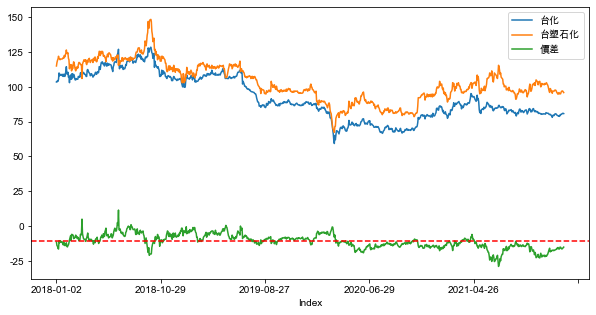

In [16]:
df.iloc[:, 4].plot(figsize=(10,5))
df.iloc[:, 46].plot(figsize=(10,5))
(df.iloc[:, 4] - df.iloc[:, 46]).plot(figsize=(10,5))
plt.axhline((df.iloc[:, 4] - df.iloc[:, 46]).mean(), color='red', linestyle='--') # Add the mean
plt.legend(['台化', '台塑石化','價差'])
score, pvalue, _ = coint(df.iloc[:, 38] , df.iloc[:, 40])
print(pvalue)

In [17]:
ratios =  df.iloc[:, 46] / df.iloc[:, 4]
#ratios.plot()
print(int(len(ratios) * 0.70))
train = ratios[:681]
test = ratios[681:]

681


1.1271769991072063


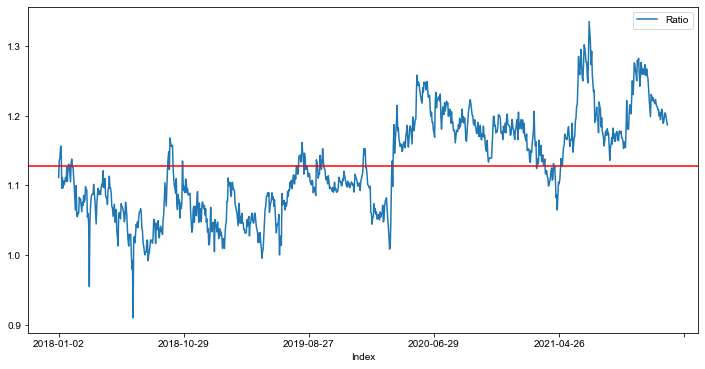

In [18]:
ratios.plot(figsize=(12,6))
plt.axhline(ratios.mean(), color = 'red')
print(ratios.mean())
plt.legend(['Ratio'])

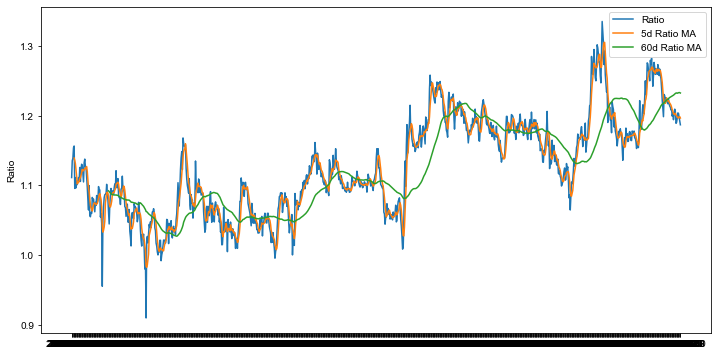

In [19]:
ratios_mavg5 = ratios.rolling(window=5, center=False).mean()
ratios_mavg60 = ratios.rolling(window=60, center=False).mean()
std_60 = ratios.rolling(window=60, center=False).std()
zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
plt.figure(figsize=(12, 6))
plt.plot(ratios.index, ratios.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg60.index, ratios_mavg60.values)
plt.legend(['Ratio', '5d Ratio MA', '60d Ratio MA'])

plt.ylabel('Ratio')
plt.show()

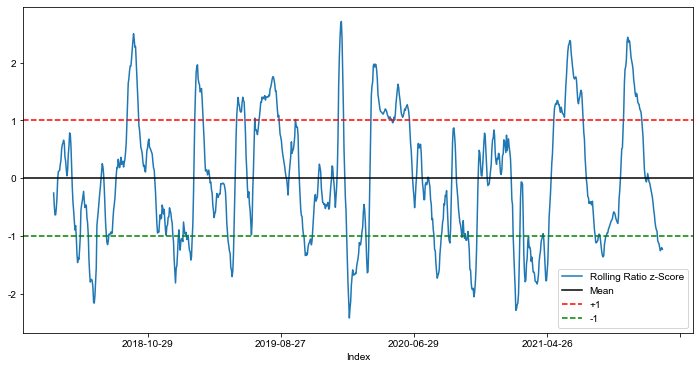

In [20]:
plt.figure(figsize=(12,6))
zscore_60_5.plot()
#plt.xlim('2013-03-25', '2016-07-01')
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.show()

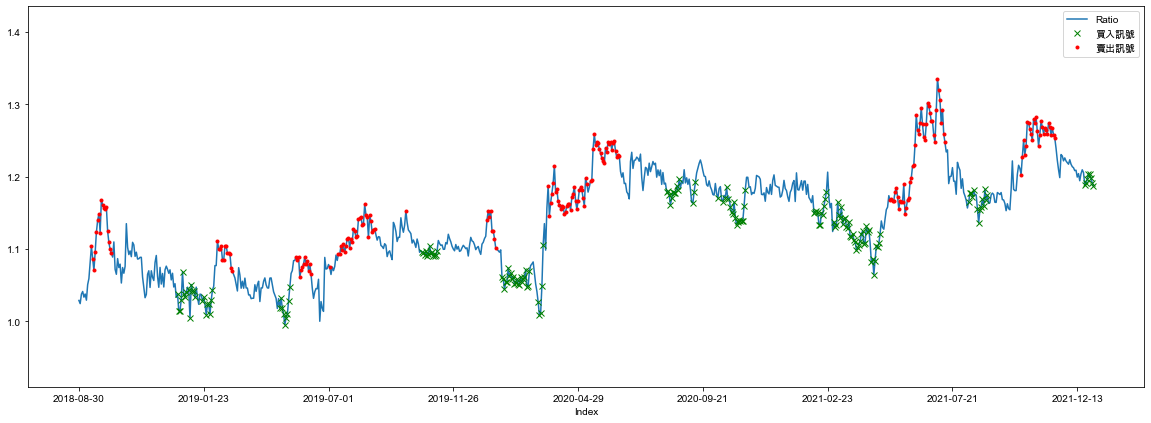

In [21]:
ratios[160:].plot(figsize=(20,7))
buy = ratios.copy()
sell = ratios.copy()
buy[zscore_60_5>-1] = 0
sell[zscore_60_5<1] = 0
buy[160:].plot(color='g', linestyle='None', marker='x')
sell[160:].plot(color='r', linestyle='None', marker='.')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratios.min(), ratios.max() + 0.1))
#plt.xlim('2013-08-15','2016-07-07')
plt.legend(['Ratio', '買入訊號', '賣出訊號'])
plt.show()

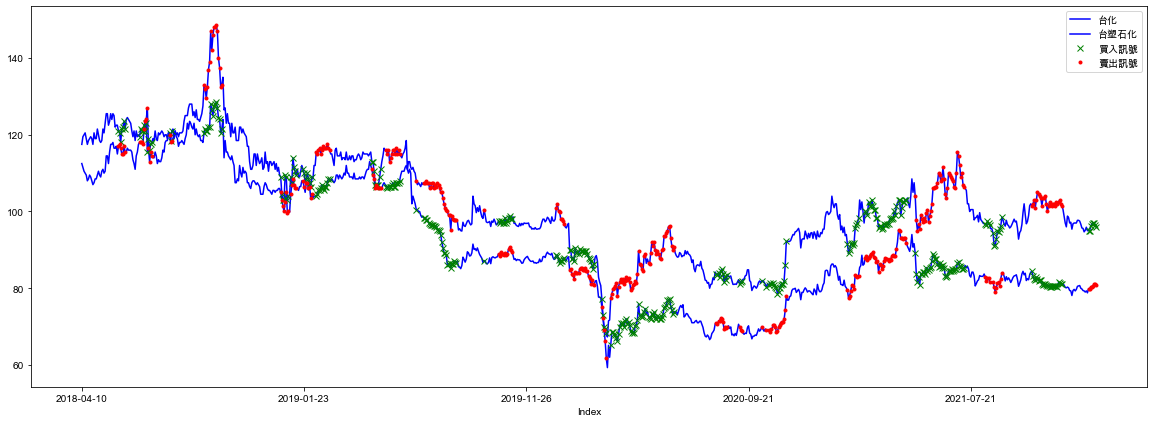

In [22]:
plt.figure(figsize=(20,7))
S1 = df.iloc[:, 46]
S2 = df.iloc[:, 4]

S1[60:].plot(color='b')
S2[60:].plot(color='b')
buyR = 0*S1.copy()
sellR = 0*S1.copy()

# When you buy the ratio, you buy stock S1 and sell S2
buyR[buy!=0] = S1[buy!=0]
sellR[buy!=0] = S2[buy!=0]

# When you sell the ratio, you sell stock S1 and buy S2
buyR[sell!=0] = S2[sell!=0]
sellR[sell!=0] = S1[sell!=0]

buyR[60:].plot(color='g', linestyle='None', marker='x')
sellR[60:].plot(color='r', linestyle='None', marker='.')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, min(S1.min(), S2.min()) -5 , max(S1.max(), S2.max()) +5))
#plt.ylim(25, 105)
#plt.xlim('2013-03-22', '2016-07-04')

plt.legend(['台化', '台塑石化', '買入訊號', '賣出訊號'])
plt.show()

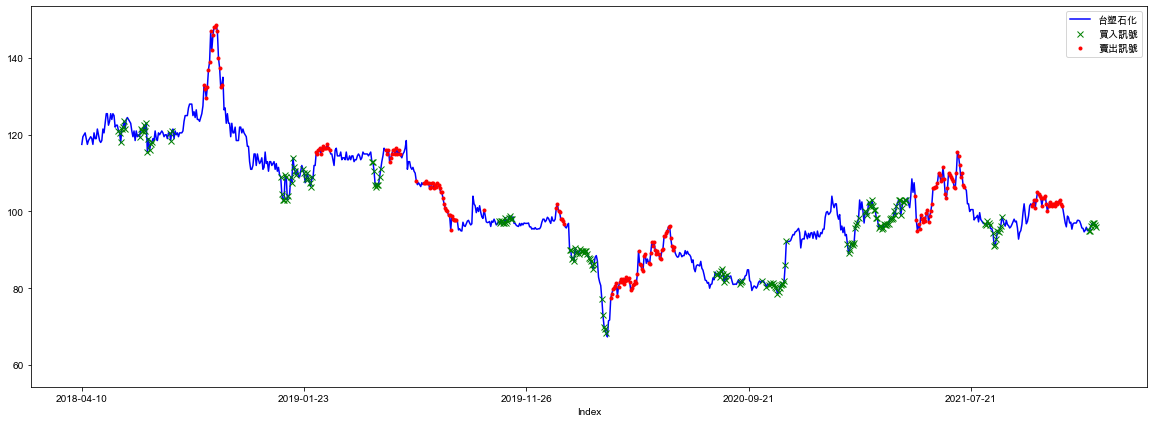

In [23]:
plt.figure(figsize=(20,7))
S1 = df.iloc[:, 46]

S1[60:].plot(color='b')
buyR = 0*S1.copy()
sellR = 0*S1.copy()

# When you buy the ratio, you buy stock S1 and sell S2
buyR[buy!=0] = S1[buy!=0]

# When you sell the ratio, you sell stock S1 and buy S2
sellR[sell!=0] = S1[sell!=0]

buyR[60:].plot(color='g', linestyle='None', marker='x')
sellR[60:].plot(color='r', linestyle='None', marker='.')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, min(S1.min(), S2.min()) -5 , max(S1.max(), S2.max()) +5))
#plt.ylim(25, 105)
#plt.xlim('2013-03-22', '2016-07-04')

plt.legend(['台塑石化',  '買入訊號', '賣出訊號'])
plt.show()

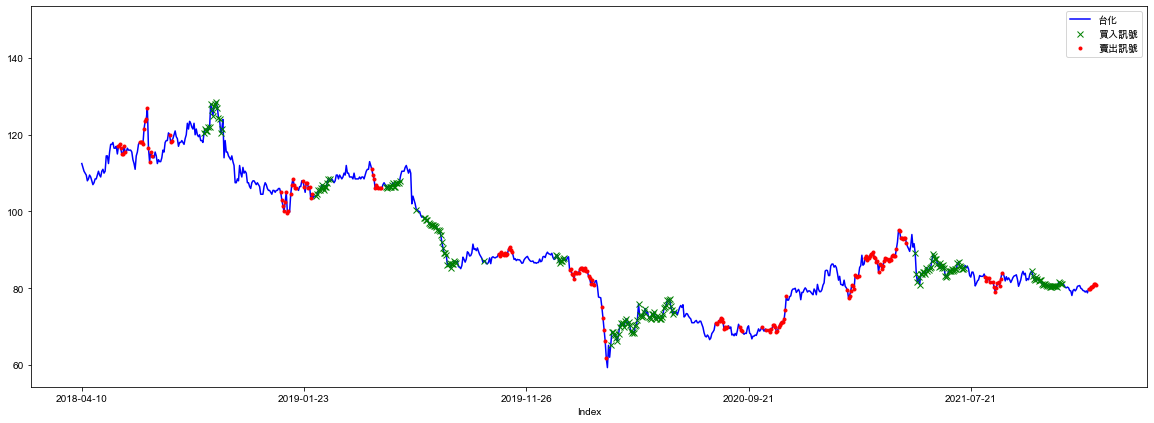

In [24]:
plt.figure(figsize=(20,7))
S2 = df.iloc[:, 4]

S2[60:].plot(color='b')
buyR = 0*S1.copy()
sellR = 0*S1.copy()

# When you buy the ratio, you buy stock S1 and sell S2
sellR[buy!=0] = S2[buy!=0]

# When you sell the ratio, you sell stock S1 and buy S2
buyR[sell!=0] = S2[sell!=0]

buyR[60:].plot(color='g', linestyle='None', marker='x')
sellR[60:].plot(color='r', linestyle='None', marker='.')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, min(S1.min(), S2.min()) -5 , max(S1.max(), S2.max()) +5))
#plt.ylim(25, 105)
#plt.xlim('2013-03-22', '2016-07-04')

plt.legend(['台化', '買入訊號', '賣出訊號'])
plt.show()

In [25]:
def trade(S1, S2, window1, window2):
    
    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0
    
    cost = 0
    profit = 0
    # Compute rolling mean and rolling standard deviation
    ratios = S1/S2
    ma1 = ratios.rolling(window=window1,
                               center=False).mean()
    ma2 = ratios.rolling(window=window2,
                               center=False).mean()
    std = ratios.rolling(window=window2,
                        center=False).std()
    zscore = (ma1 - ma2)/std
    
    result_arr = []
    pl = S1.copy() * 0
    # Simulate trading
    # Start with no money and no positions
    money = 0
    countS1 = 0
    countS2 = 0
    
    for i in range(len(ratios)):
        # Sell short if the z-score is > 1
        if zscore[i] < -1:
            money += S1[i] - S2[i] * ratios[i]
            cost += (S1[i] * 1000 + S2[i] * ratios[i] *1000) * 1.001425
            countS1 -= 1
            countS2 += ratios[i]
            result_arr.append([ratios.index[i],"空1張",f"空{abs(countS1)}張",f"多{ratios[i]}張",f"多{abs(countS2)}張",profit])
            #print('做空股票A 做多股票B Ratio %s 空%s張 多%s張 '%(ratios[i], countS1,countS2))
        # Buy long if the z-score is < -1
        elif zscore[i] > 1:
            money -= S1[i] - S2[i] * ratios[i]
            cost += (S1[i] * 1000 + S2[i] * ratios[i] *1000) * 1.001425
            countS1 += 1
            countS2 -= ratios[i]
            result_arr.append([ratios.index[i],"多1張",f"多{abs(countS1)}張",f"空{ratios[i]}張",f"空{abs(countS2)}張",profit])
            #print('做多股票A 做空股票B Ratio %s 多%s張 空%s張'%(ratios[i], countS1,countS2))
        # Clear positions if the z-score between -.5 and .5
        elif abs(zscore[i]) < 0.75:
            money += S1[i] * countS1 + S2[i] * countS2
            #print(f' S1[i] = {S1[i]} * countS1 = {abs(countS1}, cost = {cost}')
            
            #print(f'this profit = {S1[i] * countS1 * 1000 + S2[i] * countS2 * 1000}')
            earning = (S1[i] * countS1 * 1000  + S2[i] * countS2 * 1000 ) 
            #print(f'profit = {profit}, cost = {cost}')
            fee = (S1[i] * abs(countS1) * 1000 + S2[i] * abs(countS2) * 1000)*0.001425
            
            earning = earning - fee
            pl[i] = earning
            profit = profit + earning
            
            result_arr.append([ratios.index[i], "0",f"平倉{abs(countS1)}張", "0",f"平倉{abs(countS2)}張",profit])
            
            
            countS1 = 0
            countS2 = 0
            
            #print('平倉  收益 = %s %s %s %s'%(profit,ratios[i], countS1,countS2))
            #print(money) 
            
    return money,result_arr,pl

In [26]:
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter

def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

42
Index
2020-12-23   -287.107856
2021-12-01    -72.189083
Name: X1326.TW.Close, dtype: float64
724
952
1023190.0640663265
Index(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05', '2018-01-08',
       '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12', '2018-01-15',
       ...
       '2021-12-17', '2021-12-20', '2021-12-21', '2021-12-22', '2021-12-23',
       '2021-12-24', '2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30'],
      dtype='object', name='Index', length=974)
0.9523809523809523
198.65764999741475
3973.152999948295


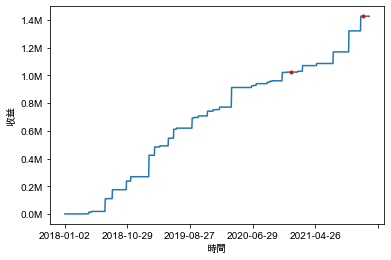

In [27]:
formatter = FuncFormatter(millions)
fig, ax = plt.subplots()
m,r,p = trade(df.iloc[:, 4],df.iloc[:, 46],60,5)
output = pd.DataFrame(data=r)
output.columns = ["Index","台化","台化總張數","台塑石化","台塑石化總張數","目前收益"]
output.set_index('Index',inplace = True)
ax.yaxis.set_major_formatter(formatter)
np.cumsum(p).plot()
plt.xlabel("時間")
plt.ylabel("收益")
print(len(p[p!=0]) )
print(p[p<0])
arr = p.index
for i in range(0,len(p)):
    if arr[i] == '2020-12-23' or arr[i] == '2021-12-01':
        print(i)
print(np.cumsum(p)['2020-12-23'])
print(np.cumsum(p).index)
plt.plot(724,np.cumsum(p)['2020-12-23'], marker='.',color = 'red')
plt.plot(952,np.cumsum(p)['2021-12-01'], marker='.',color = 'red')
print(len(p[p> 0]) / len(p[p!=0]))
print(np.mean(p[p>0]) / abs(np.mean(p[p<0])) )
print(sum(p[p>=0]) / abs(sum(p[p<0])) )

In [28]:
output.to_csv('/Users/xueyichen/Desktop/NTUT/110-2/Data Science/final/data/台化_台塑石化.csv') 

41
0.8780487804878049
Index
2018-11-16     -2820.436645
2018-12-24     -2565.301834
2019-03-26    -23544.584385
2021-06-07      -326.087989
2021-07-23   -220352.734866
Name: X3045.TW.Close, dtype: float64
214 Index
2018-11-16     -2820.436645
2018-12-24     -2565.301834
2019-03-26    -23544.584385
2021-06-07      -326.087989
2021-07-23   -220352.734866
Name: X3045.TW.Close, dtype: float64
240 Index
2018-11-16     -2820.436645
2018-12-24     -2565.301834
2019-03-26    -23544.584385
2021-06-07      -326.087989
2021-07-23   -220352.734866
Name: X3045.TW.Close, dtype: float64
295 Index
2018-11-16     -2820.436645
2018-12-24     -2565.301834
2019-03-26    -23544.584385
2021-06-07      -326.087989
2021-07-23   -220352.734866
Name: X3045.TW.Close, dtype: float64
829 Index
2018-11-16     -2820.436645
2018-12-24     -2565.301834
2019-03-26    -23544.584385
2021-06-07      -326.087989
2021-07-23   -220352.734866
Name: X3045.TW.Close, dtype: float64
862 Index
2018-11-16     -2820.436645
2018-12-2

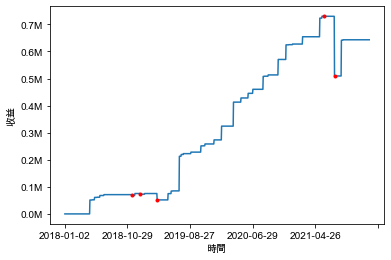

In [29]:
m,r,p = trade(df.iloc[:, 38],df.iloc[:, 40],60,5)
output = pd.DataFrame(data=r)
output.columns = ["Index","台灣大哥大","台灣大哥大總張數","遠傳","遠傳總張數","目前收益"]
output.set_index('Index',inplace = True)

formatter = FuncFormatter(millions)
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
np.cumsum(p).plot()
plt.xlabel("時間")
plt.ylabel("收益")
print(len(p[p!=0]) )
print(len(p[p> 0]) / len(p[p!=0]))
dd = p[p<0]
print(dd)
arr = p.index
for i in range(0,len(p)):
    if arr[i] in dd :
        print(i,dd)
plt.plot(214,np.cumsum(p)['2018-11-16'], marker='.',color = 'red')
plt.plot(240,np.cumsum(p)['2018-12-24'], marker='.',color = 'red')
plt.plot(295,np.cumsum(p)['2019-03-26'], marker='.',color = 'red')
plt.plot(829,np.cumsum(p)['2021-06-07'], marker='.',color = 'red')
plt.plot(862,np.cumsum(p)['2021-07-23'], marker='.',color = 'red')
print(min(p[p<0]))
print(np.mean(p[p>0]) / abs(np.mean(p[p<0])) )
print(sum(p[p>=0]) / abs(sum(p[p<0])) )

In [30]:
output.to_csv('/Users/xueyichen/Desktop/NTUT/110-2/Data Science/final/data/台灣大哥大_遠傳.csv') 